In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
laliga = pd.read_csv('FMEL_Dataset.csv')

In [54]:
laliga.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800


In [55]:
laliga.isnull().sum()

id              0
season          0
division        0
round           0
localTeam       0
visitorTeam     0
localGoals      0
visitorGoals    0
date            0
timestamp       0
dtype: int64

In [56]:
laliga = laliga[laliga.division==1]

In [57]:
laliga.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800


In [58]:
# la = (laliga['localGoals'] + laliga['visitorGoals']).grouby(laliga['localTeam'])

In [59]:
laliga['local_team_won']=laliga.apply(lambda row: 1 if row['localGoals']>row['visitorGoals'] else 0,axis=1)
laliga['visitor_team_won'] = laliga.apply(lambda row: 1 if row['localGoals'] < row['visitorGoals'] else 0, axis = 1)
laliga['draw'] = laliga.apply(lambda row: 1 if row['localGoals'] == row['visitorGoals'] else 0, axis =1)

In [60]:
laliga.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp,local_team_won,visitor_team_won,draw
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400,0,0,1
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400,0,0,1
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400,1,0,0
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800,1,0,0
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800,0,0,1


In [61]:
dd = laliga.copy()
da = dd.groupby(['season','localTeam'])['local_team_won'].sum().reset_index().rename(columns={'localTeam':'club','local_team_won':'won'})
da.head(8)

,season,club,won
0,1970-71,Atletico de Bilbao,11
1,1970-71,Atletico de Madrid,13
2,1970-71,Barcelona,11
3,1970-71,CD Malaga,6
4,1970-71,Celta de Vigo,12
5,1970-71,Elche,4
6,1970-71,Espanol,7
7,1970-71,Granada,9


In [62]:
laliga.tail()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp,local_team_won,visitor_team_won,draw
36680,36681,2017-18,1,38,Villarreal,Real Madrid,2,2,19/05/2018,1526680800,0,0,1
36681,36682,2017-18,1,38,Atletico de Bilbao,Espanol,0,1,20/05/2018,1526767200,0,1,0
36682,36683,2017-18,1,38,Barcelona,Real Sociedad,1,0,20/05/2018,1526767200,1,0,0
36683,36684,2017-18,1,38,Valencia,Deportivo,2,1,20/05/2018,1526767200,1,0,0
36684,36685,2017-18,1,38,Atletico de Madrid,Eibar,2,2,20/05/2018,1526767200,0,0,1


In [63]:
df=laliga.copy()

In [64]:
a=df.groupby(['season','localTeam'])['local_team_won'].sum().reset_index().rename(columns={'localTeam': 'club(local)','local_team_won': 'won'})
a.head()

,season,club(local),won
0,1970-71,Atletico de Bilbao,11
1,1970-71,Atletico de Madrid,13
2,1970-71,Barcelona,11
3,1970-71,CD Malaga,6
4,1970-71,Celta de Vigo,12


In [65]:
b=df.groupby(['season','visitorTeam'])['visitor_team_won'].sum().reset_index().rename(columns={'visitorTeam': 'club(visitor)','visitor_team_won': 'won'})
b.head()

,season,club(visitor),won
0,1970-71,Atletico de Bilbao,3
1,1970-71,Atletico de Madrid,4
2,1970-71,Barcelona,8
3,1970-71,CD Malaga,2
4,1970-71,Celta de Vigo,3


In [66]:
c=df.groupby(['season','localTeam'])['draw'].sum().reset_index().rename(columns={'localTeam': 'club(local)','draw': 'draw'})
c.head()

,season,club(local),draw
0,1970-71,Atletico de Bilbao,3
1,1970-71,Atletico de Madrid,2
2,1970-71,Barcelona,1
3,1970-71,CD Malaga,6
4,1970-71,Celta de Vigo,3


In [67]:
d=df.groupby(['season','visitorTeam'])['draw'].sum().reset_index().rename(columns={'visitorTeam': 'club(visitor)','draw': 'draw'})
d.head()

,season,club(visitor),draw
0,1970-71,Atletico de Bilbao,4
1,1970-71,Atletico de Madrid,6
2,1970-71,Barcelona,4
3,1970-71,CD Malaga,6
4,1970-71,Celta de Vigo,2


In [68]:
e=df.groupby(['season','localTeam'])['visitor_team_won'].sum().reset_index().rename(columns={'localTeam': 'club(local)','visitor_team_won': 'lost'})
e.head()

,season,club(local),lost
0,1970-71,Atletico de Bilbao,1
1,1970-71,Atletico de Madrid,0
2,1970-71,Barcelona,3
3,1970-71,CD Malaga,3
4,1970-71,Celta de Vigo,0


In [69]:
f=df.groupby(['season','visitorTeam'])['local_team_won'].sum().reset_index().rename(columns={'visitorTeam': 'club(visitor)','local_team_won': 'lost'})
f.head()

,season,club(visitor),lost
0,1970-71,Atletico de Bilbao,8
1,1970-71,Atletico de Madrid,5
2,1970-71,Barcelona,3
3,1970-71,CD Malaga,7
4,1970-71,Celta de Vigo,10


In [70]:
df.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp,local_team_won,visitor_team_won,draw
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400,0,0,1
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400,0,0,1
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400,1,0,0
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800,1,0,0
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800,0,0,1


In [71]:
a = df.groupby(['season', 'localTeam'])['local_team_won'].sum().reset_index().rename(columns={'localTeam':'club','local_team_won':'won'})
b = df.groupby(['season', 'visitorTeam'])['visitor_team_won'].sum().reset_index().rename(columns={'visitorTeam':'club','visitor_team_won':'won'})
c = df.groupby(['season', 'localTeam'])['draw'].sum().reset_index().rename(columns={'localTeam':'club','draw':'draw'})
d = df.groupby(['season', 'visitorTeam'])['draw'].sum().reset_index().rename(columns={'visitorTeam':'club','draw':'draw'})
e = df.groupby(['season', 'localTeam'])['visitor_team_won'].sum().reset_index().rename(columns={'localTeam':'club','visitor_team_won':'lost'})
f = df.groupby(['season', 'visitorTeam'])['local_team_won'].sum().reset_index().rename(columns={'visitorTeam':'club','local_team_won':'lost'})

In [72]:
d.head()

,season,club,draw
0,1970-71,Atletico de Bilbao,4
1,1970-71,Atletico de Madrid,6
2,1970-71,Barcelona,4
3,1970-71,CD Malaga,6
4,1970-71,Celta de Vigo,2


In [73]:
pt = a.merge(b, on=['season','club']).merge(c, on=['season','club']).merge(d,on=['season','club']).merge(e, on=['season','club']).merge(f, on=['season','club'])
pt.head()

,season,club,won_x,won_y,draw_x,draw_y,lost_x,lost_y
0,1970-71,Atletico de Bilbao,11,3,3,4,1,8
1,1970-71,Atletico de Madrid,13,4,2,6,0,5
2,1970-71,Barcelona,11,8,1,4,3,3
3,1970-71,CD Malaga,6,2,6,6,3,7
4,1970-71,Celta de Vigo,12,3,3,2,0,10


In [74]:
a=df.groupby(['season','localTeam'])['local_team_won'].sum().reset_index().rename(columns={'localTeam': 'club','local_team_won': 'won'})
b=df.groupby(['season','visitorTeam'])['visitor_team_won'].sum().reset_index().rename(columns={'visitorTeam': 'club','visitor_team_won': 'won'})
c=df.groupby(['season','localTeam'])['draw'].sum().reset_index().rename(columns={'localTeam': 'club','draw': 'draw'})
d=df.groupby(['season','visitorTeam'])['draw'].sum().reset_index().rename(columns={'visitorTeam': 'club','draw': 'draw'})
e=df.groupby(['season','localTeam'])['visitor_team_won'].sum().reset_index().rename(columns={'localTeam': 'club','visitor_team_won': 'lost'})
f=df.groupby(['season','visitorTeam'])['local_team_won'].sum().reset_index().rename(columns={'visitorTeam': 'club','local_team_won': 'lost'})

In [75]:
point_table=a.merge(b,on=['season','club']).merge(c,on=['season','club']).merge(d,on=['season','club']).merge(e,on=['season','club']).merge(f,on=['season','club'])
point_table.tail(8)
#x represent home ground
#y represent away ground

,season,club,won_x,won_y,draw_x,draw_y,lost_x,lost_y
920,2017-18,Leganes,9,3,4,3,6,13
921,2017-18,Levante,7,4,6,7,6,8
922,2017-18,Malaga,4,1,3,2,12,16
923,2017-18,Real Madrid,12,10,4,6,3,3
924,2017-18,Real Sociedad,10,4,3,4,6,11
925,2017-18,Sevilla,11,6,5,2,3,11
926,2017-18,Valencia,13,9,3,4,3,6
927,2017-18,Villarreal,11,7,3,4,5,8


In [76]:
point_table[point_table['won_x']>10][point_table['season']=='2016-17']

C:\Users\Ramesh Pradhan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,season,club,won_x,won_y,draw_x,draw_y,lost_x,lost_y
889,2016-17,Atletico de Bilbao,13,6,4,2,2,11
890,2016-17,Atletico de Madrid,14,9,2,7,3,3
891,2016-17,Barcelona,15,13,3,3,1,3
902,2016-17,Real Madrid,14,15,4,2,1,2
904,2016-17,Sevilla,14,7,4,5,1,7
907,2016-17,Villarreal,11,8,4,6,4,5


In [77]:
point_table= point_table.rename(columns={'won_x':'home_win','won_y':'away_win','lost_x':'home_loss','lost_y':'away_loss'})

In [78]:
point_table.head()

,season,club,home_win,away_win,draw_x,draw_y,home_loss,away_loss
0,1970-71,Atletico de Bilbao,11,3,3,4,1,8
1,1970-71,Atletico de Madrid,13,4,2,6,0,5
2,1970-71,Barcelona,11,8,1,4,3,3
3,1970-71,CD Malaga,6,2,6,6,3,7
4,1970-71,Celta de Vigo,12,3,3,2,0,10


In [79]:
pt.head()

,season,club,won_x,won_y,draw_x,draw_y,lost_x,lost_y
0,1970-71,Atletico de Bilbao,11,3,3,4,1,8
1,1970-71,Atletico de Madrid,13,4,2,6,0,5
2,1970-71,Barcelona,11,8,1,4,3,3
3,1970-71,CD Malaga,6,2,6,6,3,7
4,1970-71,Celta de Vigo,12,3,3,2,0,10


In [80]:
pt = pt.rename(columns={'won_x':'home_win','won_y':'away_win','draw_x':'home_draw','draw_y':'away_draw','lost_x':'home_lost','lost_y':'away_lost'})
pt.head()

,season,club,home_win,away_win,home_draw,away_draw,home_lost,away_lost
0,1970-71,Atletico de Bilbao,11,3,3,4,1,8
1,1970-71,Atletico de Madrid,13,4,2,6,0,5
2,1970-71,Barcelona,11,8,1,4,3,3
3,1970-71,CD Malaga,6,2,6,6,3,7
4,1970-71,Celta de Vigo,12,3,3,2,0,10


In [81]:
pt['matches_won'] = pt.home_win + pt.away_win
pt['matches_lost'] = pt.home_lost + pt.away_lost
pt['matches_drawn'] = pt.home_draw + pt.away_draw
pt['total_matches'] = pt.matches_won + pt.matches_lost + pt.matches_drawn
pt.head()

,season,club,home_win,away_win,home_draw,away_draw,home_lost,away_lost,matches_won,matches_lost,matches_drawn,total_matches
0,1970-71,Atletico de Bilbao,11,3,3,4,1,8,14,9,7,30
1,1970-71,Atletico de Madrid,13,4,2,6,0,5,17,5,8,30
2,1970-71,Barcelona,11,8,1,4,3,3,19,6,5,30
3,1970-71,CD Malaga,6,2,6,6,3,7,8,10,12,30
4,1970-71,Celta de Vigo,12,3,3,2,0,10,15,10,5,30


In [82]:
pt['point'] = pt.matches_won * 3 + pt.matches_drawn * 1
pt.head()

,season,club,home_win,away_win,home_draw,away_draw,home_lost,away_lost,matches_won,matches_lost,matches_drawn,total_matches,point
0,1970-71,Atletico de Bilbao,11,3,3,4,1,8,14,9,7,30,49
1,1970-71,Atletico de Madrid,13,4,2,6,0,5,17,5,8,30,59
2,1970-71,Barcelona,11,8,1,4,3,3,19,6,5,30,62
3,1970-71,CD Malaga,6,2,6,6,3,7,8,10,12,30,36
4,1970-71,Celta de Vigo,12,3,3,2,0,10,15,10,5,30,50


In [83]:
point_table['matches_won']=point_table.home_win+point_table.away_win
point_table['matches_lost']=point_table.home_loss+point_table.away_loss
point_table['matches_drawn']=point_table.draw_x+point_table.draw_y
point_table=point_table.drop(['draw_x','draw_y'],axis=1)
point_table['total_matches']=point_table.matches_won+point_table.matches_lost+point_table.matches_drawn

In [84]:
point_table.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches
0,1970-71,Atletico de Bilbao,11,3,1,8,14,9,7,30
1,1970-71,Atletico de Madrid,13,4,0,5,17,5,8,30
2,1970-71,Barcelona,11,8,3,3,19,6,5,30
3,1970-71,CD Malaga,6,2,3,7,8,10,12,30
4,1970-71,Celta de Vigo,12,3,0,10,15,10,5,30


In [85]:
point_table['points']=(point_table.matches_won*3)+(point_table.matches_drawn*1)
point_table.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points
0,1970-71,Atletico de Bilbao,11,3,1,8,14,9,7,30,49
1,1970-71,Atletico de Madrid,13,4,0,5,17,5,8,30,59
2,1970-71,Barcelona,11,8,3,3,19,6,5,30,62
3,1970-71,CD Malaga,6,2,3,7,8,10,12,30,36
4,1970-71,Celta de Vigo,12,3,0,10,15,10,5,30,50


In [86]:
df.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp,local_team_won,visitor_team_won,draw
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400,0,0,1
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400,0,0,1
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400,1,0,0
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800,1,0,0
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800,0,0,1


In [87]:
g=df.groupby(['season','localTeam'])['localGoals'].sum().reset_index().rename(columns={'localTeam': 'club','localGoals': 'home_goals'})
h=df.groupby(['season','visitorTeam'])['visitorGoals'].sum().reset_index().rename(columns={'visitorTeam': 'club','visitorGoals': 'away_goals'})
i=df.groupby(['season','localTeam'])['visitorGoals'].sum().reset_index().rename(columns={'localTeam': 'club','visitorGoals': 'goals_conceded'})
j=df.groupby(['season','visitorTeam'])['localGoals'].sum().reset_index().rename(columns={'visitorTeam': 'club','localGoals': 'goals_conceded'})

In [88]:
point_table=point_table.merge(g,on=['season','club']).merge(h,on=['season','club']).merge(i,on=['season','club']).merge(j,on=['season','club'])
point_table.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_conceded_x,goals_conceded_y
0,1970-71,Atletico de Bilbao,11,3,1,8,14,9,7,30,49,23,17,4,27
1,1970-71,Atletico de Madrid,13,4,0,5,17,5,8,30,59,38,13,9,11
2,1970-71,Barcelona,11,8,3,3,19,6,5,30,62,32,18,11,11
3,1970-71,CD Malaga,6,2,3,7,8,10,12,30,36,14,13,10,22
4,1970-71,Celta de Vigo,12,3,0,10,15,10,5,30,50,23,14,4,28


In [89]:
point_table['goals_scored']=point_table.home_goals+point_table.away_goals
point_table['goals_conceded']=point_table.goals_conceded_x+point_table.goals_conceded_y
point_table['goal_difference']=point_table.goals_scored-point_table.goals_conceded
point_table= point_table.drop(['goals_conceded_x','goals_conceded_y'],axis=1)

In [90]:
point_table.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Atletico de Bilbao,11,3,1,8,14,9,7,30,49,23,17,40,31,9
1,1970-71,Atletico de Madrid,13,4,0,5,17,5,8,30,59,38,13,51,20,31
2,1970-71,Barcelona,11,8,3,3,19,6,5,30,62,32,18,50,22,28
3,1970-71,CD Malaga,6,2,3,7,8,10,12,30,36,14,13,27,32,-5
4,1970-71,Celta de Vigo,12,3,0,10,15,10,5,30,50,23,14,37,32,5


In [91]:
point_table= point_table.sort_values(by=['season','points','goal_difference']).reset_index().drop('index',axis=1)
point_table.head(10)

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7
5,1970-71,Sporting de Gijon,9,1,4,11,10,15,5,30,35,29,6,35,44,-9
6,1970-71,CD Malaga,6,2,3,7,8,10,12,30,36,14,13,27,32,-5
7,1970-71,Granada,9,1,1,11,10,12,8,30,38,24,9,33,34,-1
8,1970-71,Real Sociedad,9,1,3,8,10,11,9,30,39,18,5,23,27,-4
9,1970-71,Sevilla,11,2,1,10,13,11,6,30,45,26,8,34,42,-8


In [92]:
point_table.tail(n=12).sort_values('points',ascending=False)

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
927,2017-18,Barcelona,16,12,0,1,28,1,9,38,93,53,46,99,29,70
926,2017-18,Atletico de Madrid,12,11,1,4,23,5,10,38,79,30,28,58,22,36
925,2017-18,Real Madrid,12,10,3,3,22,6,10,38,76,54,40,94,44,50
924,2017-18,Valencia,13,9,3,6,22,9,7,38,73,36,29,65,38,27
923,2017-18,Villarreal,11,7,5,8,18,13,7,38,61,35,22,57,50,7
922,2017-18,Betis,10,8,5,9,18,14,6,38,60,35,25,60,61,-1
921,2017-18,Sevilla,11,6,3,11,17,14,7,38,58,31,18,49,58,-9
920,2017-18,Getafe,9,6,6,7,15,13,10,38,55,26,16,42,33,9
918,2017-18,Girona,8,6,8,7,14,15,9,38,51,26,24,50,59,-9
919,2017-18,Eibar,8,6,7,8,14,15,9,38,51,26,18,44,50,-6


In [93]:
df=point_table.copy()

In [94]:
df.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7


In [98]:
champs=df[df.groupby(['season'])['points'].transform(max)==df.points].reset_index()
champs.tail(15)

,index,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
34,667,2004-05,Barcelona,14,11,1,3,25,4,9,38,84,40,33,73,29,44
35,687,2005-06,Barcelona,15,10,1,5,25,6,7,38,82,45,35,80,35,45
36,706,2006-07,Real Madrid,12,11,3,5,23,8,7,38,76,32,34,66,40,26
37,707,2006-07,Barcelona,14,8,0,6,22,6,10,38,76,41,37,78,33,45
38,727,2007-08,Real Madrid,17,10,2,5,27,7,4,38,85,53,31,84,36,48
39,747,2008-09,Barcelona,14,13,2,3,27,5,6,38,87,61,44,105,35,70
40,767,2009-10,Barcelona,18,13,0,1,31,1,6,38,99,57,41,98,24,74
41,787,2010-11,Barcelona,16,14,1,1,30,2,6,38,96,46,49,95,21,74
42,807,2011-12,Real Madrid,16,16,1,1,32,2,4,38,100,70,51,121,32,89
43,827,2012-13,Barcelona,18,14,0,2,32,2,4,38,100,63,52,115,40,75


In [96]:
champs=champs.drop(champs.index[[37]])
champs.tail(20).sort_values('season',ascending=False)

,index,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
48,927,2017-18,Barcelona,16,12,0,1,28,1,9,38,93,53,46,99,29,70
47,907,2016-17,Real Madrid,14,15,1,2,29,3,6,38,93,48,58,106,41,65
46,887,2015-16,Barcelona,16,13,2,3,29,5,4,38,91,67,45,112,29,83
45,867,2014-15,Barcelona,16,14,2,2,30,4,4,38,94,64,46,110,21,89
44,847,2013-14,Atletico de Madrid,15,13,0,4,28,4,6,38,90,49,28,77,26,51
43,827,2012-13,Barcelona,18,14,0,2,32,2,4,38,100,63,52,115,40,75
42,807,2011-12,Real Madrid,16,16,1,1,32,2,4,38,100,70,51,121,32,89
41,787,2010-11,Barcelona,16,14,1,1,30,2,6,38,96,46,49,95,21,74
40,767,2009-10,Barcelona,18,13,0,1,31,1,6,38,99,57,41,98,24,74
39,747,2008-09,Barcelona,14,13,2,3,27,5,6,38,87,61,44,105,35,70


In [100]:
champs.club.value_counts().reset_index().rename(columns={'index':'club', 'club':'trophies'})

,club,trophies
0,Real Madrid,21
1,Barcelona,19
2,Atletico de Madrid,4
3,Valencia,2
4,Atletico de Bilbao,1
5,Deportivo,1
6,Real Sociedad,1


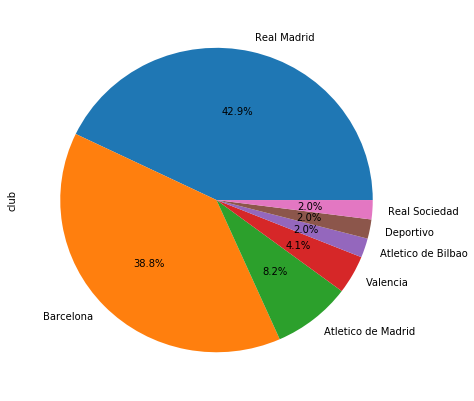

In [101]:
champs.club.value_counts().plot(kind='pie', autopct='%2.1f%%', figsize=(7,7))

### Some bar graphs showing the dominance in the league with home wins, total wins.

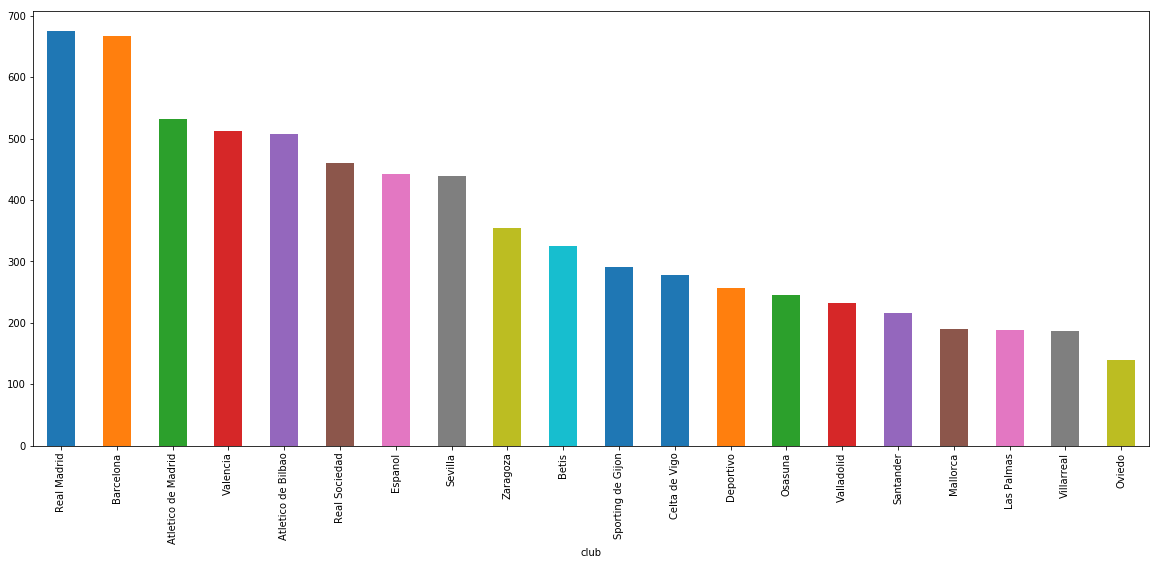

In [105]:
df.groupby(['club'])['home_win'].sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(20,8))

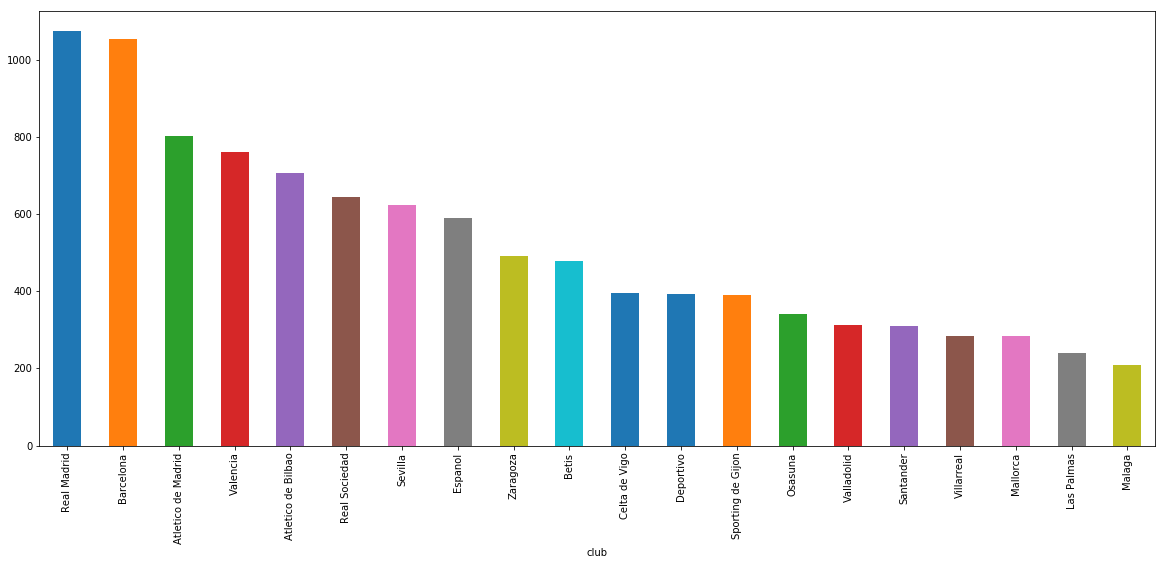

In [106]:
df.groupby(['club'])['matches_won'].sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(20,8))

### This is a ranking of teams based on total goals scored. Two arch rivals are leading the way here.

In [107]:
df.groupby(['club'])['goals_scored'].sum().sort_values(ascending=False).head(20)

club
Real Madrid           3673
Barcelona             3671
Atletico de Madrid    2620
Valencia              2547
Atletico de Bilbao    2386
Real Sociedad         2200
Sevilla               2068
Espanol               2019
Zaragoza              1836
Betis                 1670
Sporting de Gijon     1383
Celta de Vigo         1361
Deportivo             1319
Santander             1174
Osasuna               1133
Valladolid            1120
Mallorca               994
Villarreal             949
Las Palmas             866
Malaga                 779
Name: goals_scored, dtype: int64

### Top 20 goal scorer in Laliga

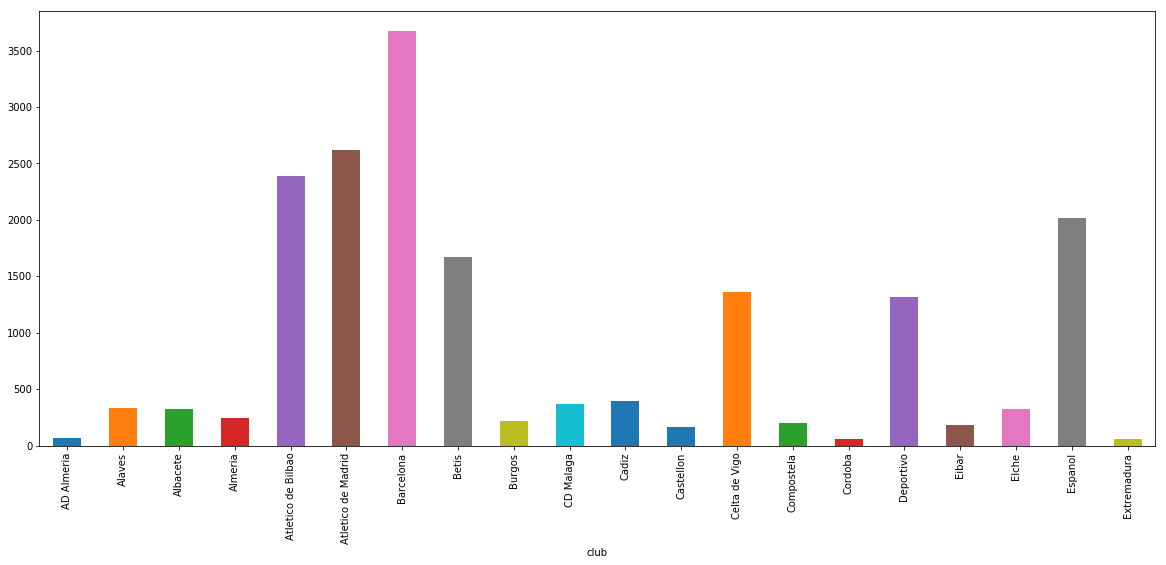

In [111]:
df.groupby(['club'])['goals_scored'].sum().head(20).plot(kind='bar',figsize=(20,8))

In [112]:
w=df.groupby(['club'])['home_goals'].sum().sort_values(ascending=False).head(20).reset_index()
x=df.groupby(['club'])['away_goals'].sum().sort_values(ascending=False).head(20).reset_index()
y=df.groupby(['club'])['goals_scored'].sum().sort_values(ascending=False).head(20).reset_index()
z=w.merge(x,on=['club']).merge(y,on=['club'])
a=df.groupby(['club'])['home_win'].sum().sort_values(ascending=False).head(20).reset_index()
b=df.groupby(['club'])['away_win'].sum().sort_values(ascending=False).head(20).reset_index()
c=df.groupby(['club'])['matches_won'].sum().sort_values(ascending=False).head(20).reset_index()
z=a.merge(b,on=['club']).merge(c,on=['club']).merge(z,on=['club'])

### Share of home goals and away goals for each team towards the total goals .

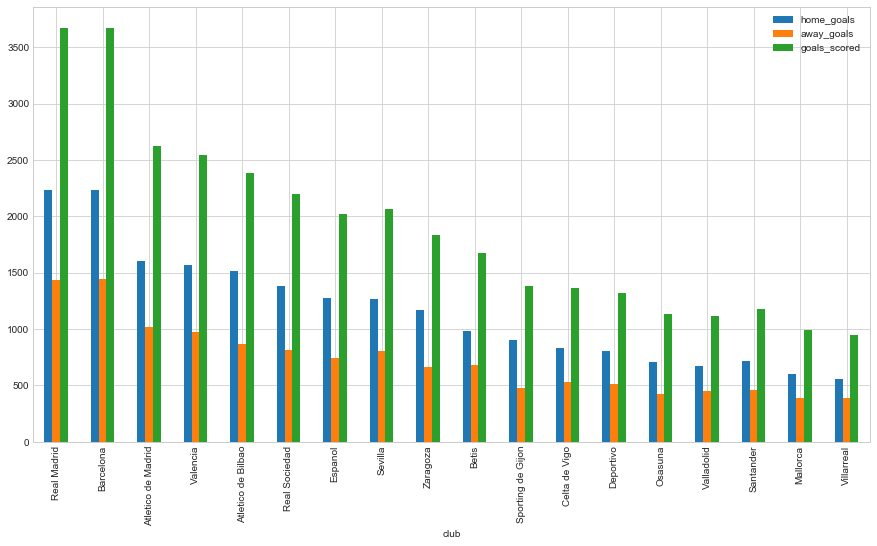

In [118]:
z.plot(x='club',y=['home_goals','away_goals','goals_scored'], kind="bar",figsize=(15,8))

### The more the number of goals scored, the more is the number of matches won. The following graph proves it.

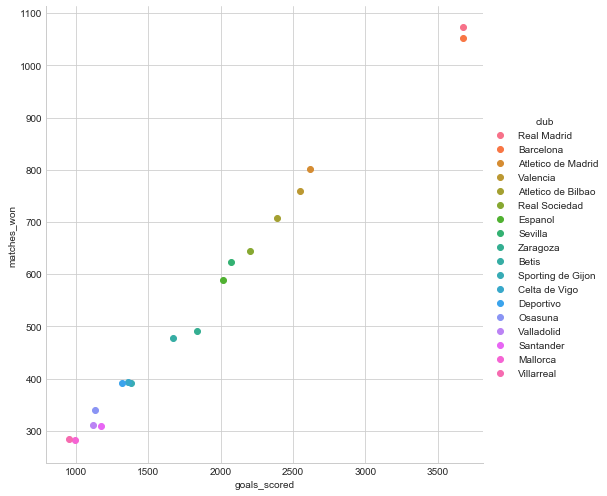

In [117]:
sns.FacetGrid(z, hue="club", size=7).map(plt.scatter, "goals_scored", "matches_won").add_legend()

### Dominance of each team on their home ground and away ground with respect to total matches won.

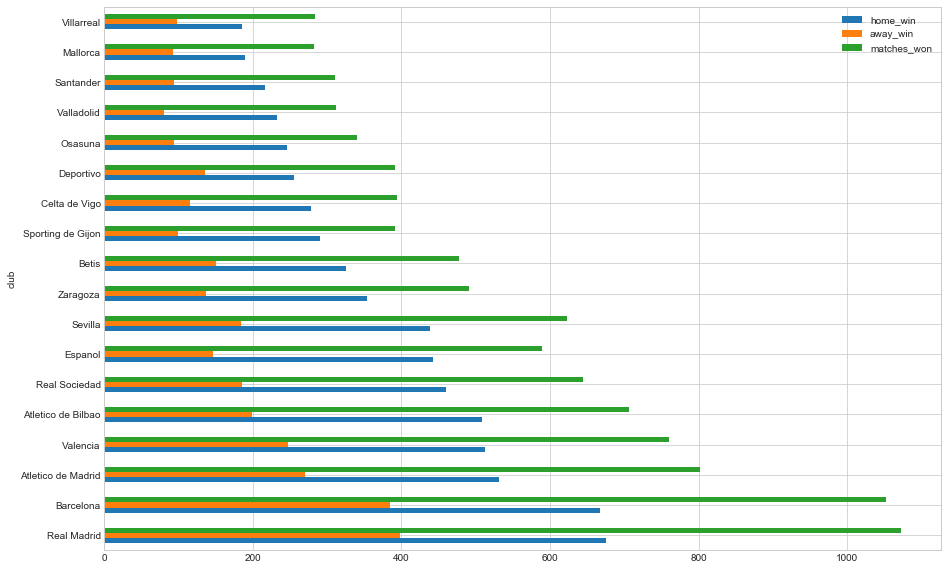

In [119]:
z.plot(x='club',y=['home_win','away_win','matches_won'], kind="barh",figsize=(15,10))